In [1]:
import pandas as pd
import spacy

In [2]:
df = pd.read_csv('BIG_DATASET.csv',delimiter=';')

In [3]:
print(df)

        ID                                               text       class  \
0     2025  ACCOUNTANT Professional Summary Skills Work Hi...  ACCOUNTANT   
1     2026  ACCOUNTANT I Summary A business management gra...  ACCOUNTANT   
2     2027  INVESTMENT ACCOUNTANT Career Focus Accomplishe...  ACCOUNTANT   
3     2028  STAFF ACCOUNTANT Summary Professional Accounta...  ACCOUNTANT   
4     2029  ACCOUNTANT Summary Senior-Level IT Finance Man...  ACCOUNTANT   
...    ...                                                ...         ...   
3578   132  b'Financial Manager Resume Sample\nDorothy Wil...   MANAGMENT   
3579   133                                                b''   MANAGMENT   
3580   136  b"LINDA A. RINALDI\n\n916.437.5298\n916.437.22...   MANAGMENT   
3581   144  b'Assistant General Manager Resume\n\nRobert B...   MANAGMENT   
3582   152  b"Bank Assistant Manager Resume\n\nBrooklyn Ya...   MANAGMENT   

      class_number  seniority_number  Unnamed: 5  
0                0      

In [4]:
df['seniority_text'] = df['seniority_number'].map({0: 'junior', 1: 'midlevel', 2: 'senior'})

In [5]:
df['class'].value_counts()

class
ENGINEERING               220
INFORMATION-TECHNOLOGY    217
FITNESS                   194
TEACHER                   193
ACCOUNTANT                180
FINANCE                   180
ADVOCATE                  175
SALES                     172
BUSINESS-DEVELOPMENT      158
BANKING                   156
DESIGNER                  155
HR                        146
DIGITAL-MEDIA             143
ARTS                      142
CONSULTANT                140
CHEF                      139
CONSTRUCTION              137
AVIATION                  129
PUBLIC-RELATIONS          122
HEALTHCARE                114
APPAREL                   111
AGRICULTURE                83
MANAGMENT                  65
AUTOMOBILE                 59
BPO                        45
ARCHITECTS                  8
Name: count, dtype: int64

In [6]:
normalized_counts = df['class'].value_counts(normalize=True).round(2) * 100
class_names = normalized_counts.index.to_list()
total_count = df['class'].value_counts()
class_info = [
    f"{class_name}: {count} ({f'{percentage:.2f}%'})"
    for class_name, count, percentage in zip(class_names, total_count, normalized_counts)
]
print("Class Information:")
for class_info_item in class_info:
    print(class_info_item)

Class Information:
ENGINEERING: 220 (6.00%)
INFORMATION-TECHNOLOGY: 217 (6.00%)
FITNESS: 194 (5.00%)
TEACHER: 193 (5.00%)
ACCOUNTANT: 180 (5.00%)
FINANCE: 180 (5.00%)
ADVOCATE: 175 (5.00%)
SALES: 172 (5.00%)
BUSINESS-DEVELOPMENT: 158 (4.00%)
BANKING: 156 (4.00%)
DESIGNER: 155 (4.00%)
HR: 146 (4.00%)
DIGITAL-MEDIA: 143 (4.00%)
ARTS: 142 (4.00%)
CONSULTANT: 140 (4.00%)
CHEF: 139 (4.00%)
CONSTRUCTION: 137 (4.00%)
AVIATION: 129 (4.00%)
PUBLIC-RELATIONS: 122 (3.00%)
HEALTHCARE: 114 (3.00%)
APPAREL: 111 (3.00%)
AGRICULTURE: 83 (2.00%)
MANAGMENT: 65 (2.00%)
AUTOMOBILE: 59 (2.00%)
BPO: 45 (1.00%)
ARCHITECTS: 8 (0.00%)


In [7]:
df['seniority_text'].value_counts()

seniority_text
senior      1833
midlevel    1323
junior       427
Name: count, dtype: int64

In [8]:
normalized_counts = df['seniority_text'].value_counts(normalize=True).round(2) * 100
class_names = normalized_counts.index.to_list()
total_count = df['seniority_text'].value_counts()
class_info = [
    f"{class_name}: {count} ({f'{percentage:.2f}%'})"
    for class_name, count, percentage in zip(class_names, total_count, normalized_counts)
]
print("Class Information:")
for class_info_item in class_info:
    print(class_info_item)

Class Information:
senior: 1833 (51.00%)
midlevel: 1323 (37.00%)
junior: 427 (12.00%)


In [9]:
tipos_dados = df.dtypes
print(tipos_dados)

ID                    int64
text                 object
class                object
class_number          int64
seniority_number      int64
Unnamed: 5          float64
seniority_text       object
dtype: object


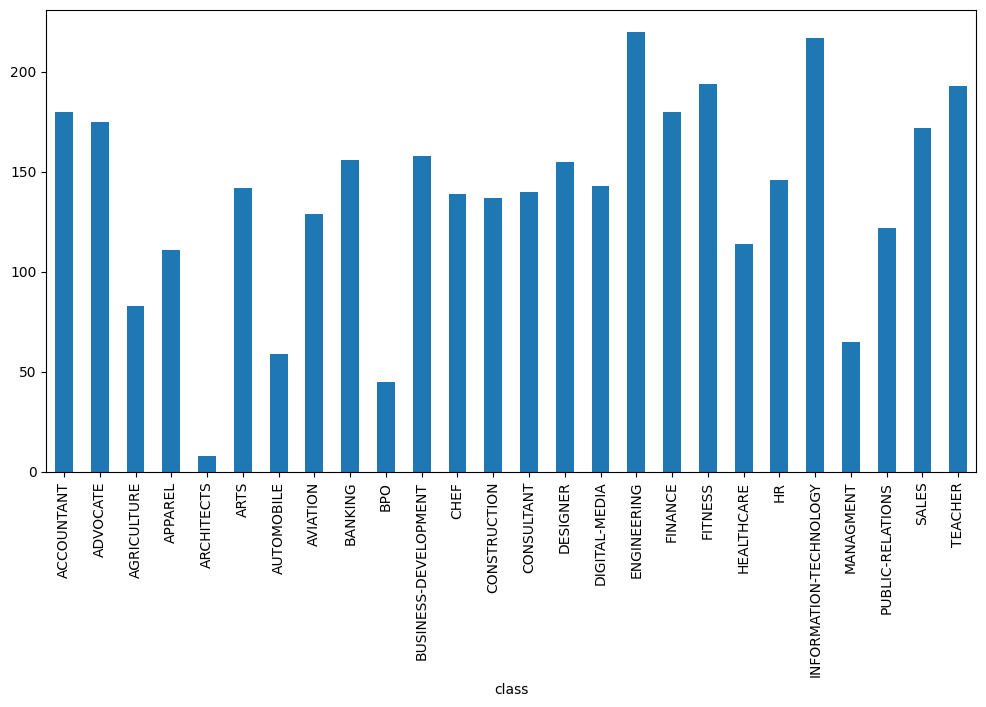

In [10]:
import matplotlib.pyplot as plt
df['class'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

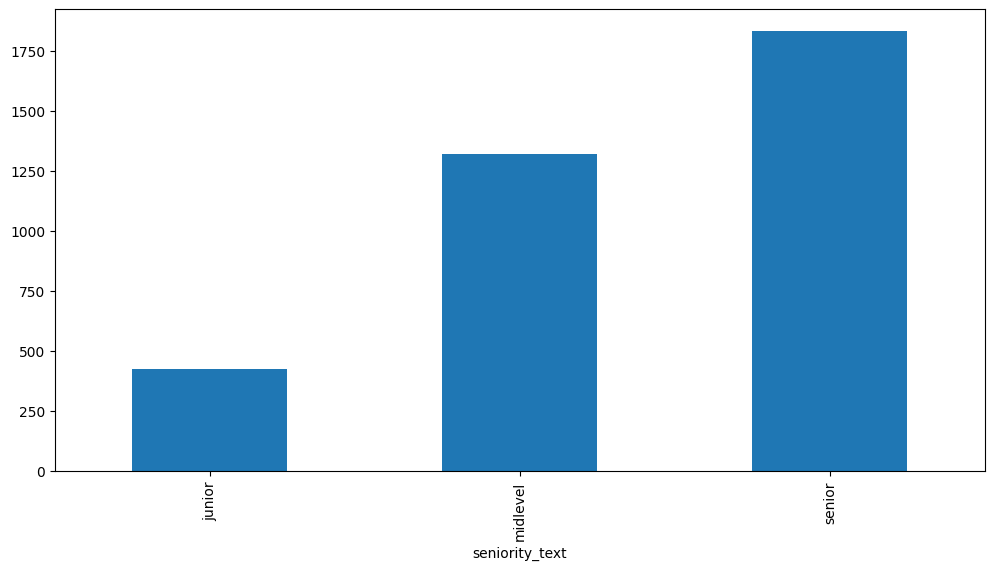

In [11]:
import matplotlib.pyplot as plt
df['seniority_text'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

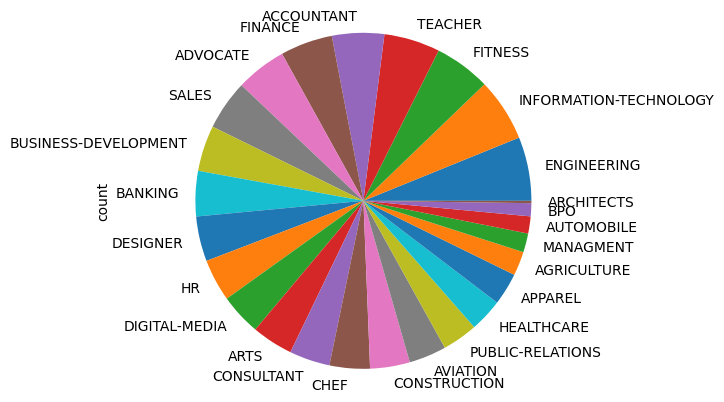

In [12]:
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind='pie')
plt.axis('equal');

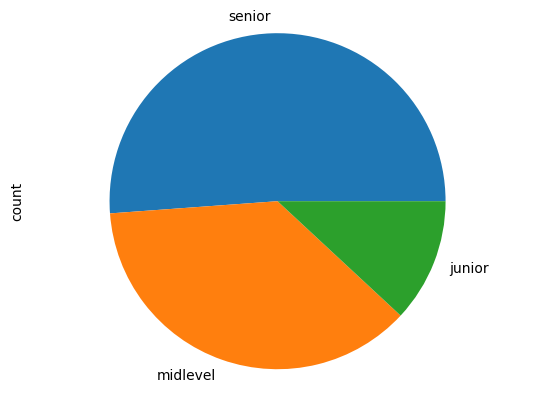

In [13]:
import matplotlib.pyplot as plt

df['seniority_text'].value_counts().plot(kind='pie')
plt.axis('equal');

In [14]:
# Filter based on a condition (replace 'column_name' and 'value' with your actual values)
filtered_df = df[df['class_number'] == 24]

# Print filtered DataFrame
print(filtered_df)

        ID                                               text       class  \
3293  1091  b'CURRICULUM VITAE\nTITLE AND NAME :\nADDRESS ...  ARCHITECTS   
3294  1092  b'Career Services \xe2\x97\x8f 220 Administrat...  ARCHITECTS   
3295  1093  b'CURRICULUM VITAE\n\nMOHAMMAD ABRAR\nMobile: ...  ARCHITECTS   
3296  1096  b'Manas Majeed\nWaterman International,\nMEP D...  ARCHITECTS   
3297  1097  b'CURRICULUM VITAE\n\nMOHAMMAD ABRAR\nMobile: ...  ARCHITECTS   
3298  1099  b'Sample resume \xe2\x80\x93 architecture\nArc...  ARCHITECTS   
3299  1101  b'RESUME of BRET RICHARD OLSEN\nDRAFTER, DATA ...  ARCHITECTS   
3573  1102  b'Manas Majeed\nWaterman International,\nMEP D...  ARCHITECTS   

      class_number  seniority_number  Unnamed: 5 seniority_text  
3293            24                 2         NaN         senior  
3294            24                 0         NaN         junior  
3295            24                 1         NaN       midlevel  
3296            24                 1      

In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [17]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(df['processed_text'])

In [20]:
y = df['class']

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['class'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['class_number'])

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
xgb_model = XGBClassifier(
    n_estimators=100,     
    learning_rate=0.1,    
    max_depth=6,          
    subsample=0.8,        
    colsample_bytree=0.8, 
    random_state=42       
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
y_pred_xgb = xgb_model.predict(X_test)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)
print("XGBoost Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("XGBoost Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

XGBoost Accuracy: 0.7656903765690377
XGBoost Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.75      0.83      0.79        36
              ADVOCATE       0.85      0.83      0.84        35
           AGRICULTURE       1.00      0.59      0.74        17
               APPAREL       0.92      0.50      0.65        22
            ARCHITECTS       1.00      0.50      0.67         2
                  ARTS       0.68      0.54      0.60        28
            AUTOMOBILE       0.67      0.50      0.57        12
              AVIATION       0.82      0.88      0.85        26
               BANKING       0.71      0.65      0.68        31
                   BPO       1.00      0.44      0.62         9
  BUSINESS-DEVELOPMENT       0.74      0.72      0.73        32
                  CHEF       0.86      0.89      0.88        28
          CONSTRUCTION       0.89      0.89      0.89        27
            CONSULTANT       0.69  

In [25]:
import pickle
with open('vector_class.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
with open('model_xgboost_class.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [26]:
y_seniority = df['seniority_text']

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_seniority = label_encoder.fit_transform(df['seniority_text'])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_seniority, test_size=0.2, random_state=42, stratify=df['class_number'])

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
xgb_model_seniority = XGBClassifier(
    n_estimators=100,     
    learning_rate=0.1,    
    max_depth=6,          
    subsample=0.8,        
    colsample_bytree=0.8, 
    random_state=42       
)
xgb_model_seniority.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [30]:
y_pred_xgb = xgb_model_seniority.predict(X_test)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)
print("XGBoost Accuracy Seniority:", accuracy_score(y_test_decoded, y_pred_decoded))
print("XGBoost Classification Report Seniority:")
print(classification_report(y_test_decoded, y_pred_decoded))

XGBoost Accuracy Seniority: 0.7545327754532776
XGBoost Classification Report Seniority:
              precision    recall  f1-score   support

      junior       0.73      0.49      0.59        71
    midlevel       0.71      0.70      0.70       277
      senior       0.79      0.85      0.82       369

    accuracy                           0.75       717
   macro avg       0.74      0.68      0.70       717
weighted avg       0.75      0.75      0.75       717



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    correct_sum = sum(conf_mat[i][i] for i in range(conf_mat.shape[0]))
    incorrect_sum = sum(sum(row) for row in conf_mat) - correct_sum
    print(f"Correct predictions: {correct_sum}")
    print(f"Incorrect predictions: {incorrect_sum}")
    plt.figure(figsize=(20, 10)) 
    plt.imshow(conf_mat, interpolation='nearest', cmap='Purples')
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    labels = ['Junior', 'Pleno', 'Senior']
    plt.xticks(range(conf_mat.shape[1]), labels)
    plt.yticks(range(conf_mat.shape[0]), labels)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), ha="center", va="center", color="red")

    plt.show()

Correct predictions: 541
Incorrect predictions: 176


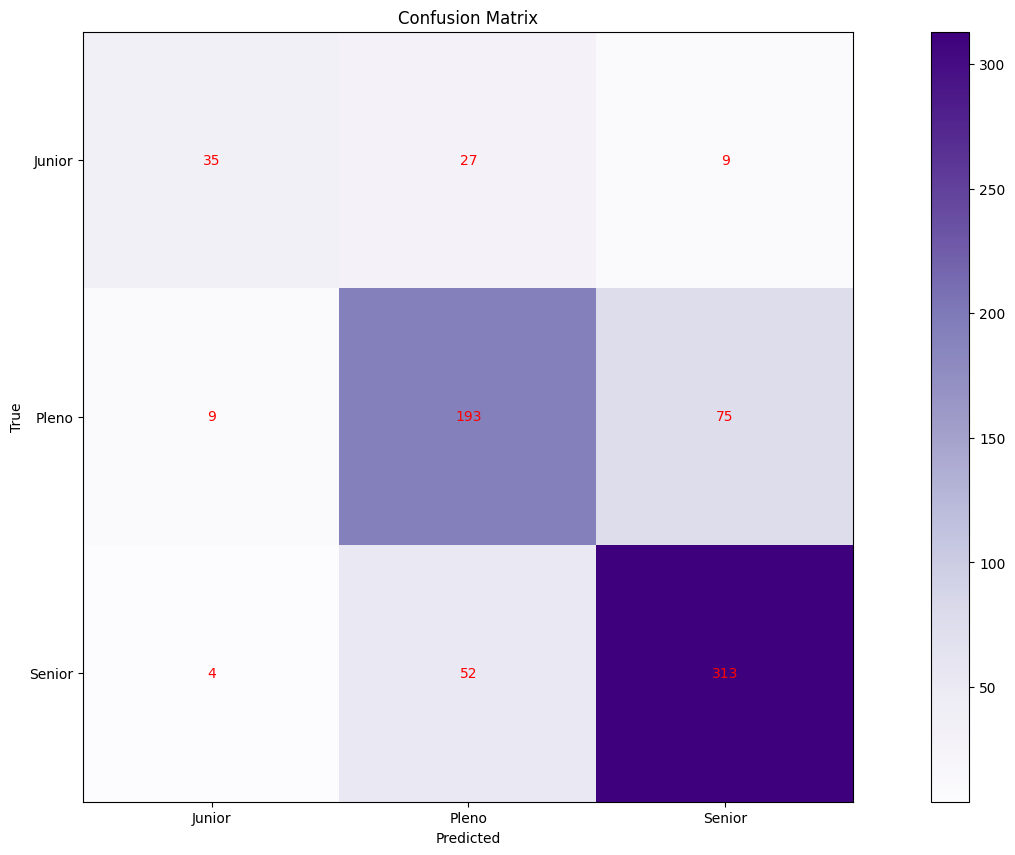

In [32]:
cm = plot_confusion_matrix(y_test, y_pred_xgb)

In [33]:
import pickle
with open('vector_seniority.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
with open('model_xgboost_seniority.pkl', 'wb') as file:
    pickle.dump(xgb_model_seniority, file)